In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_excel("DT.xlsx")
df.head(5)

,group,gender,family_sts,person_num,identity,educ,location,incom,expenses,employ_sts,...,q7,q8,q9,q10,q11,q12,q13,q14,q15,target
0,קיבלתי ליווי כלכלי של פעמונים שהסתיים לפני משב...,נקבה,נשוי/נשואה,0,חילוני/ת,פחות מ 12 שנות לימוד עם בגרות,צפון,"מתחת ל 10,800","מתחת ל 10,800",עצמאי/ת,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,קיבלתי ליווי כלכלי של פעמונים שהסתיים לפני משב...,נקבה,אלמנ/ה,3,דתי/ה,12 שנות לימוד עם בגרות,מרכז,"בין 10,800 ל 17,000","בין 10,800 ל 17,000",שכיר/ה במגזר הציבורי,...,5,1,2,2,NaN,NaN,NaN,NaN,NaN,1
2,התחלתי וסיימתי לקבל ליווי פעמונים במהלך משבר ה...,נקבה,נשוי/נשואה,2,חילוני/ת,תואר ראשון,צפון,"בין 10,800 ל 17,000","בין 10,800 ל 17,000",שכיר/ה במגזר הפרטי,...,2,1,5,2,2,3,2,3,3,0
3,קיבלתי בעבר ליווי כלכלי של פעמונים (לפני מרץ 2...,זכר,גרוש/ה,3,חילוני/ת,12 שנות לימוד עם בגרות,NaN,"מתחת ל 10,800","מתחת ל 10,800",שכיר/ה במגזר הפרטי,...,4,3,not applicable,4,4,4,4,3,4,0
4,התחלתי וסיימתי לקבל ליווי פעמונים במהלך משבר ה...,זכר,נשוי/נשואה,6,מסורתי/ת,עד 12 שנות לימוד,צפון,"בין 10,800 ל 17,000","מעל ל 17,000",שכיר/ה במגזר הפרטי,...,1,1,5,5,5,3,1,1,1,1


## pre-processing

### missing value

In [74]:
df.isnull().sum()

group                0
gender               1
family_sts           2
person_num           0
identity             2
educ                 1
location             4
incom                7
expenses             8
employ_sts           0
domain_sts          39
employ_change_1      4
employ_change_2    170
halat_avtala         3
minus_befor          7
Belief_myself       50
save_befor           5
withdrew_money       6
new_loan            10
q1                  21
q2                  18
q3                  22
q4                  20
q5                  22
q6                  24
q7                  24
q8                  20
q9                  24
q10                 19
q11                 23
q12                 21
q13                 26
q14                 25
q15                 23
target               0
dtype: int64

In [124]:

column_1 = ["gender", "family_sts", "identity", "educ", "location", "incom", "expenses", "employ_change_1", "halat_avtala", "minus_befor","save_befor","withdrew_money", "new_loan"]
for i in column_1:
    df[i] = df[i].fillna(df[i].mode()[0])

column_2 = ["domain_sts", "employ_change_2","Belief_myself"]
for i in column_2:
    df[i] = df[i].fillna("unknown")

column_3 = ["q1", "q2", "q3", "q4", "q5", "q6", "q7", "q8", "q9", "q10", "q11", "q12", "q13", "q14", "q15"]
for i in column_3:
    df[i] =df[i].replace('not applicable',3)
    med = df[i].mode()[0]
    df[i] = df[i].fillna(med)

In [76]:
df.head(5)

,group,gender,family_sts,person_num,identity,educ,location,incom,expenses,employ_sts,...,q7,q8,q9,q10,q11,q12,q13,q14,q15,target
0,קיבלתי ליווי כלכלי של פעמונים שהסתיים לפני משב...,נקבה,נשוי/נשואה,0,חילוני/ת,פחות מ 12 שנות לימוד עם בגרות,צפון,"מתחת ל 10,800","מתחת ל 10,800",עצמאי/ת,...,5.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,0
1,קיבלתי ליווי כלכלי של פעמונים שהסתיים לפני משב...,נקבה,אלמנ/ה,3,דתי/ה,12 שנות לימוד עם בגרות,מרכז,"בין 10,800 ל 17,000","בין 10,800 ל 17,000",שכיר/ה במגזר הציבורי,...,5.0,1.0,2.0,2.0,5.0,3.0,3.0,3.0,3.0,1
2,התחלתי וסיימתי לקבל ליווי פעמונים במהלך משבר ה...,נקבה,נשוי/נשואה,2,חילוני/ת,תואר ראשון,צפון,"בין 10,800 ל 17,000","בין 10,800 ל 17,000",שכיר/ה במגזר הפרטי,...,2.0,1.0,5.0,2.0,2.0,3.0,2.0,3.0,3.0,0
3,קיבלתי בעבר ליווי כלכלי של פעמונים (לפני מרץ 2...,זכר,גרוש/ה,3,חילוני/ת,12 שנות לימוד עם בגרות,מרכז,"מתחת ל 10,800","מתחת ל 10,800",שכיר/ה במגזר הפרטי,...,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,0
4,התחלתי וסיימתי לקבל ליווי פעמונים במהלך משבר ה...,זכר,נשוי/נשואה,6,מסורתי/ת,עד 12 שנות לימוד,צפון,"בין 10,800 ל 17,000","מעל ל 17,000",שכיר/ה במגזר הפרטי,...,1.0,1.0,5.0,5.0,5.0,3.0,1.0,1.0,1.0,1


In [77]:
df.isnull().sum()

group              0
gender             0
family_sts         0
person_num         0
identity           0
educ               0
location           0
incom              0
expenses           0
employ_sts         0
domain_sts         0
employ_change_1    0
employ_change_2    0
halat_avtala       0
minus_befor        0
Belief_myself      0
save_befor         0
withdrew_money     0
new_loan           0
q1                 0
q2                 0
q3                 0
q4                 0
q5                 0
q6                 0
q7                 0
q8                 0
q9                 0
q10                0
q11                0
q12                0
q13                0
q14                0
q15                0
target             0
dtype: int64

In [78]:
df["target"].value_counts()

0    367
1    291
Name: target, dtype: int64

In [125]:
df = df.drop(columns=["q1", "q2", "q3", "q4", "q5", "q6", "q7", "q8", "q9", "q10", "q11", "q12", "q13", "q14", "q15","employ_change_1", "halat_avtala","withdrew_money", "new_loan", "domain_sts", "employ_change_2"])

## representation

In [79]:
import category_encoders as ce

In [84]:
columns = ["gender","employ_sts","group", "family_sts", "identity", "educ", "location", "incom", "expenses", "employ_change_1", "halat_avtala", "minus_befor","save_befor","withdrew_money", "new_loan", "domain_sts", "employ_change_2","Belief_myself"]
for i in columns:
    encoder=ce.OneHotEncoder(cols=i,return_df=True,use_cat_names=True)
    df_encoded = encoder.fit_transform(df[i])
    df = pd.concat([df, df_encoded], axis=1)
    df = df.drop(columns=i)

In [85]:
features = ["person_num","q1", "q2", "q3", "q4", "q5", "q6", "q7", "q8", "q9", "q10", "q11", "q12", "q13", "q14", "q15"]
for i in features:
    max_i = df[i].max()
    min_i = df[i].min()
    df[i] = (df[i]-min_i)/(max_i-min_i)

KeyError: "['employ_change_1' 'halat_avtala' 'withdrew_money' 'new_loan' 'domain_sts'\n 'employ_change_2'] not found in axis"

In [87]:
x_train = df.drop(columns=["target"])
y_train = df["target"]
x_train.head()

,person_num,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,domain_sts_הייטק,domain_sts_unknown,"domain_sts_ענף תרבות, אירועים והפקות","employ_change_2_כן, לרעה (למשל: פיטורין או ירידה למשרה חלקית)",employ_change_2_unknown,employ_change_2_לא,"employ_change_2_כן, לטובה (למשל: עלייה בשכר)",Belief_myself_מאמינ/ה שיש לי את הכלים,Belief_myself_unknown,Belief_myself_לא מאמינ/ה שיש לי את הכלים
0,0.000000,1.00,0.50,0.00,0.00,0.50,0.00,1.00,0.5,1.00,...,0,0,0,1,0,0,0,1,0,0
1,0.500000,0.50,0.25,0.75,0.00,0.25,0.25,1.00,0.0,0.25,...,0,0,0,0,1,0,0,1,0,0
2,0.333333,0.50,0.50,0.25,0.25,0.50,0.50,0.25,0.0,1.00,...,0,0,0,0,0,1,0,0,1,0
3,0.500000,0.75,0.50,0.50,0.75,0.75,0.75,0.75,0.5,0.50,...,0,0,0,0,1,0,0,1,0,0
4,1.000000,1.00,0.75,0.00,0.25,0.00,0.00,0.00,0.0,1.00,...,0,0,0,1,0,0,0,0,0,1


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")
print("Train\n-----------\n", pd.value_counts(Y_train)/y_train.shape[0])
print("\nTest\n-----------\n", pd.value_counts(Y_test)/Y_test.shape[0])

Train size: (526, 81)
Test size: (132, 81)
Train
-----------
 0    0.449848
1    0.349544
Name: target, dtype: float64

Test
-----------
 0    0.537879
1    0.462121
Name: target, dtype: float64


## DT model

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

HOLDOUT

In [94]:
model_DT = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [95]:
result = model_DT.score(X_test, Y_test)
print(result)

0.6666666666666666


kfold

In [96]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [97]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X_test, Y_test,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.64285714 0.64285714 0.76923077 0.69230769 0.53846154 0.84615385
 0.61538462 0.92307692 0.46153846 0.76923077]
0.6901098901098901


LOO

In [100]:
from sklearn.model_selection import LeaveOneOut
model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
results=cross_val_score(model,X_test, Y_test,cv=leave_validation)

In [101]:
print(np.mean(results))

0.6515151515151515


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_DT = {
            "max_depth": np.arange(2, 35, 1),
            "criterion": ['entropy', 'gini'],
            "max_features": ["sqr", 'log2', None],
              
             
    
             }
model_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_DT,
                           refit=True,
                           cv=5)

In [104]:
model_DT.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'max_features': ['sqr', 'log2', None]})

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
best_model_DT = model_DT.best_estimator_
print(model_DT.best_params_)
print("Roc_Auc_Score: train_set",roc_auc_score(Y_train, best_model_DT.predict(X_train)))
print("Roc_Auc_Score: val_set ",roc_auc_score(Y_test, best_model_DT.predict(X_test)))

{'criterion': 'entropy', 'max_depth': 2, 'max_features': None}
Roc_Auc_Score: train_set 0.7158196239717979
Roc_Auc_Score: val_set  0.7596398060494113


In [116]:
model_DT = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=42)
model_DT.fit(X_train, Y_train)
print("Roc_Auc_Score: train_set",roc_auc_score(Y_train, best_model_DT.predict(X_train)))
print("Roc_Auc_Score: val_set ",roc_auc_score(Y_test, best_model_DT.predict(X_test)))

Roc_Auc_Score: train_set 0.7158196239717979
Roc_Auc_Score: val_set  0.7596398060494113


Text(0.5, 1.0, '5 importent featurs')

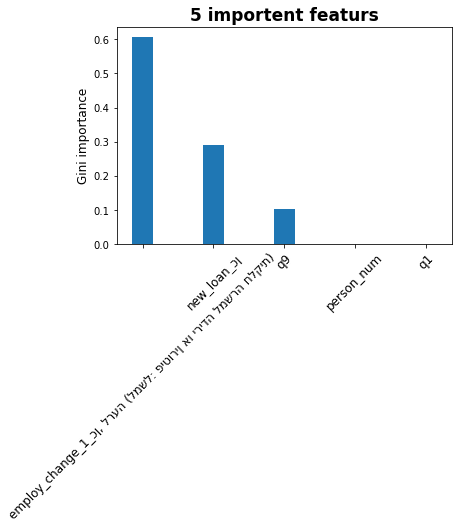

In [113]:
dict_dt = dict(zip(X_train.columns, model_DT.best_estimator_.feature_importances_))
importance = model_DT.best_estimator_.feature_importances_
x_val = sorted(dict_dt, key=dict_dt.get,reverse=True)[:5]
y_val = sorted(importance,reverse=True)[:5]
plt.bar(x_val, y_val, width= 0.3)
plt.xticks(x_val, rotation=45, fontsize='12')
plt.ylabel("Gini importance",fontsize='12' )
plt.title('5 importent featurs', fontweight='bold', fontsize='17')

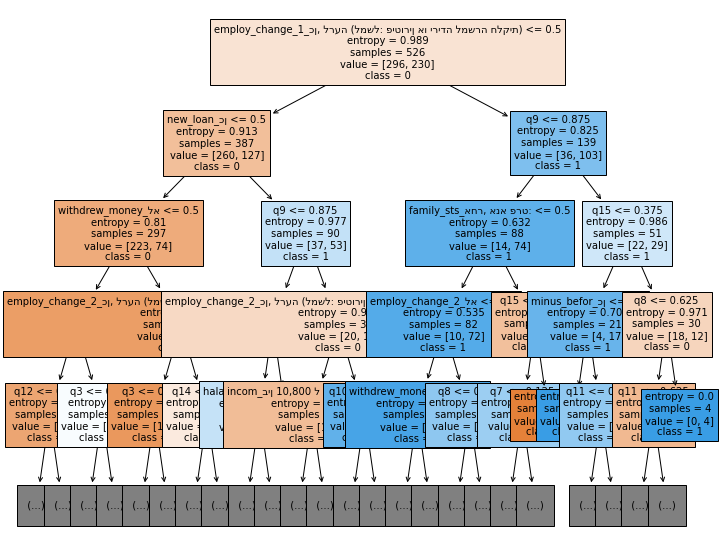

In [119]:
plt.figure(figsize=(12, 10))
plot_tree(model_DT, filled=True, max_depth=4,feature_names = X_train.columns, class_names=['0', '1'], fontsize=10)
plt.show()